In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
insta_data = pd.read_csv('/content/drive/MyDrive/mlproject/train.csv')
#test = pd.read_csv('/content/drive/MyDrive/mlproject/test.csv')

In [ ]:
insta_data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [ ]:
y = insta_data.fake
y = pd.DataFrame(y)

X = insta_data.drop(columns='fake')

# EDA

In [ ]:
insta_data.shape

(576, 12)

In [ ]:
insta_data.fake.value_counts()

0    288
1    288
Name: fake, dtype: int64

In [ ]:
X['#follows'].describe()

count     576.000000
mean      508.381944
std       917.981239
min         0.000000
25%        57.500000
50%       229.500000
75%       589.500000
max      7500.000000
Name: #follows, dtype: float64

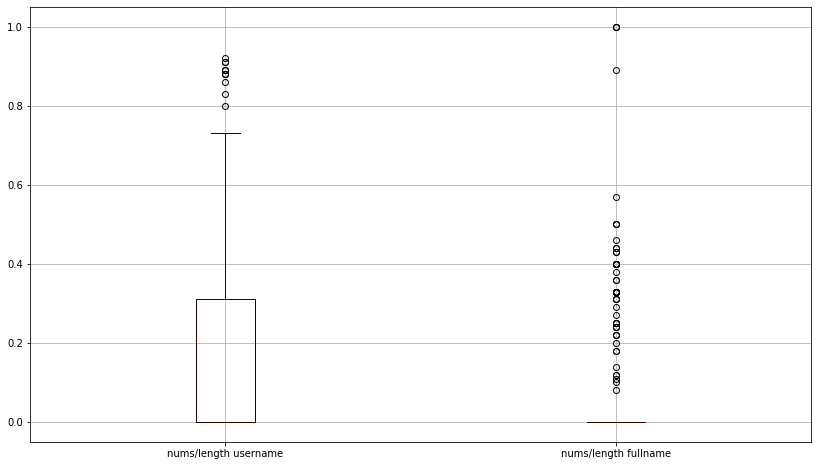

In [ ]:
boxplot = X.boxplot(column=['nums/length username', 'nums/length fullname'], figsize = [14, 8], color = '#330000')

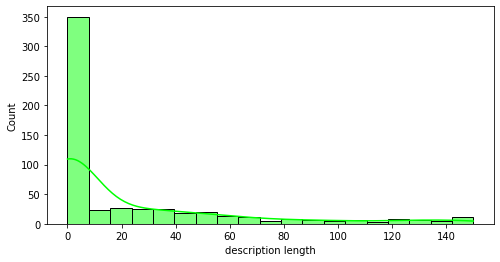

In [ ]:
plt.figure(figsize=[8, 4])
sns.histplot(X['description length'], kde = True, color='#00ff00')

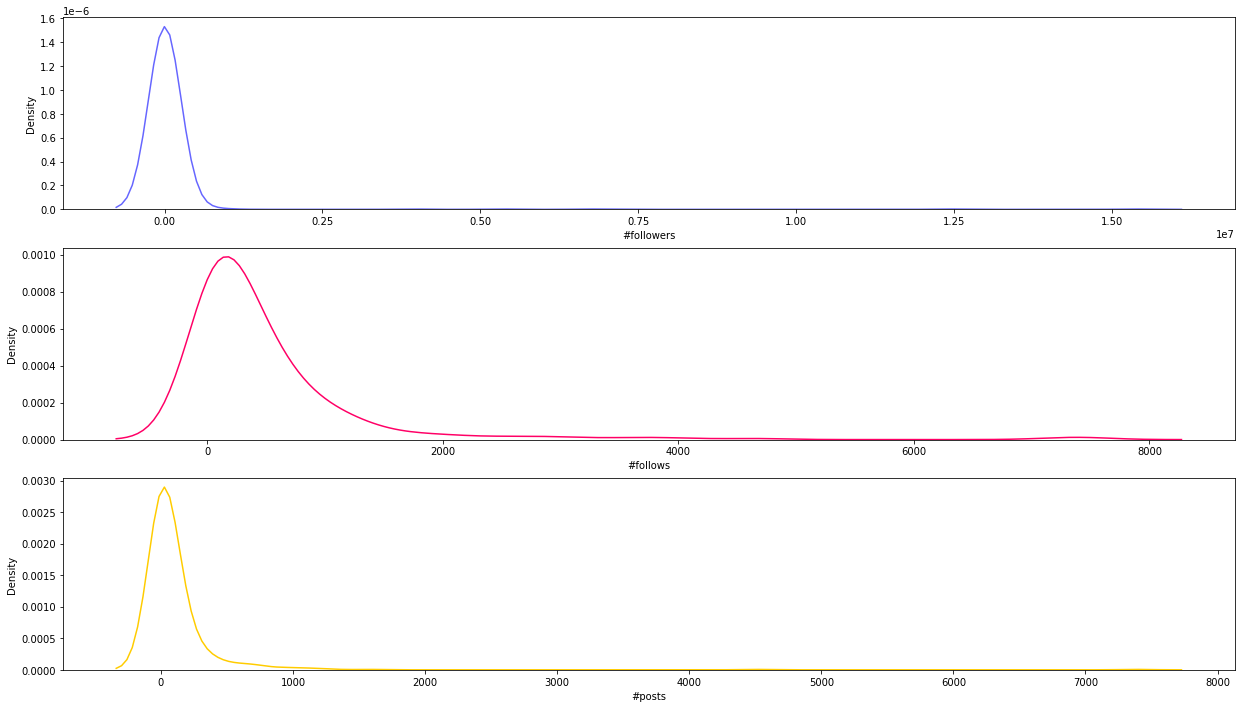

In [ ]:
plt.figure(figsize=[21, 12])
plt.subplot(3, 1, 1)
sns.kdeplot(X['#followers'], color = '#6666ff')
plt.subplot(3, 1, 2)
sns.kdeplot(X['#follows'], color = '#ff0066')
plt.subplot(3, 1, 3)
sns.kdeplot(X['#posts'], color = '#ffcc00')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

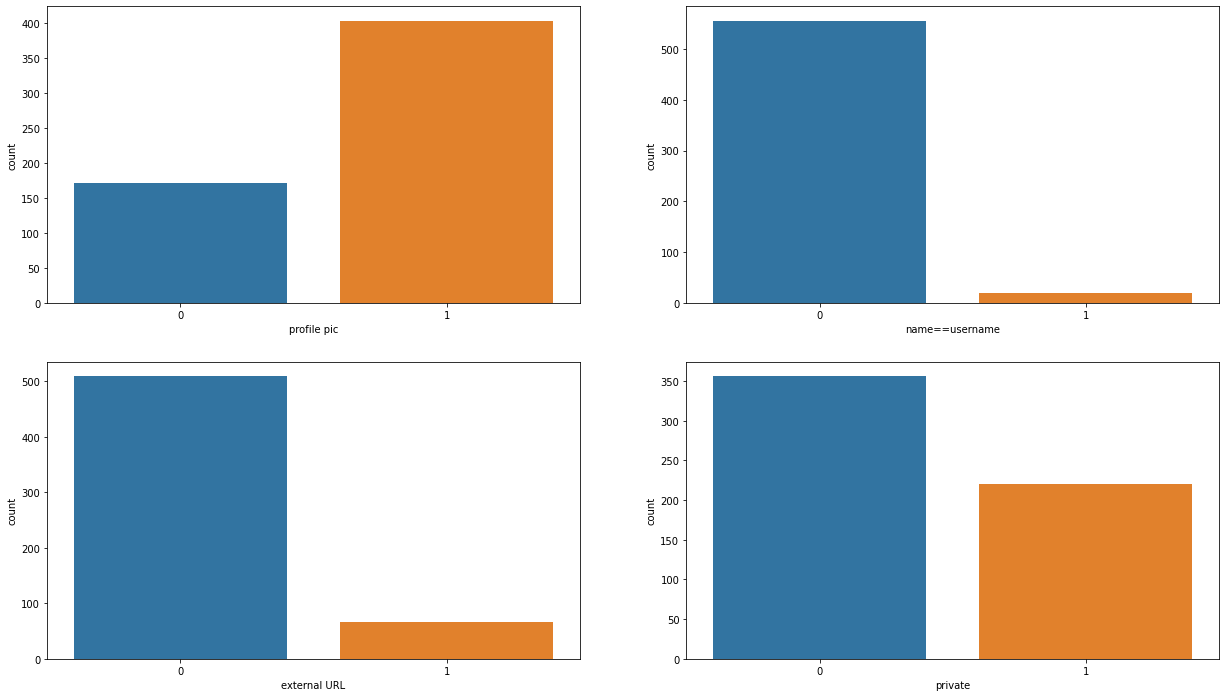

In [ ]:
plt.figure(figsize=[21, 12])


plt.subplot(2, 2, 1)
sns.countplot(X['profile pic'])

plt.subplot(2, 2, 2)
sns.countplot(X['name==username'])

plt.subplot(2, 2, 3)
sns.countplot(X['external URL'])

plt.subplot(2, 2, 4)
sns.countplot(X['private'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


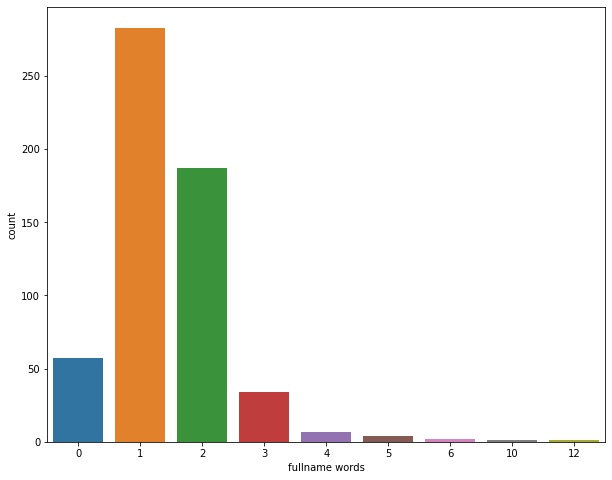

In [ ]:
plt.figure(figsize=[10, 8])
sns.countplot(X['fullname words'])

Text(0.5, 1.0, 'Матрица корреляций')

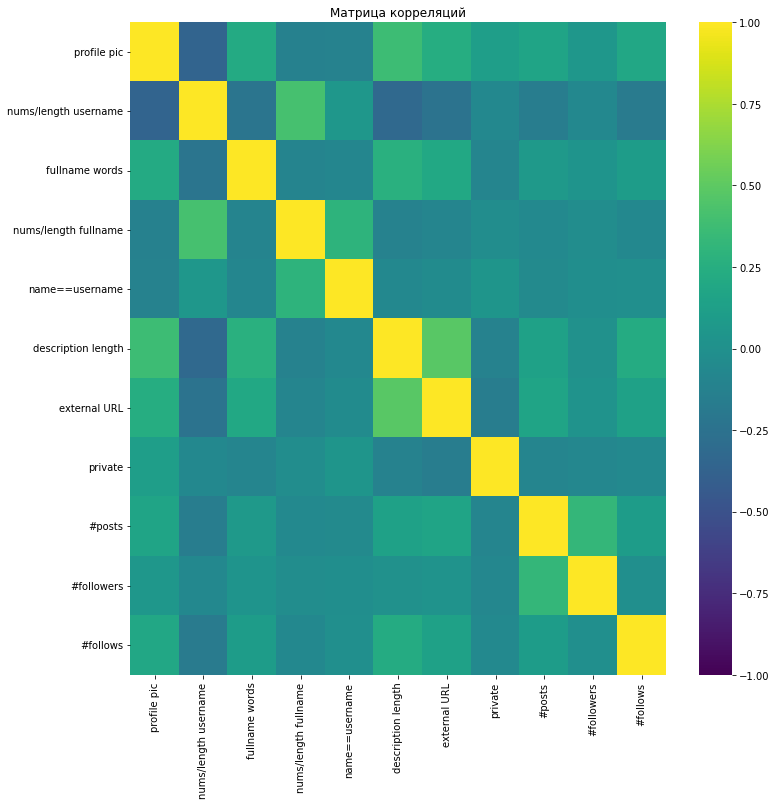

In [ ]:
plt.figure(figsize=[12, 12])
mcorr = X.corr(method='pearson')
mat = sns.heatmap(mcorr, vmin=-1, vmax=1, cmap="viridis")
mat.set_title("Матрица корреляций")

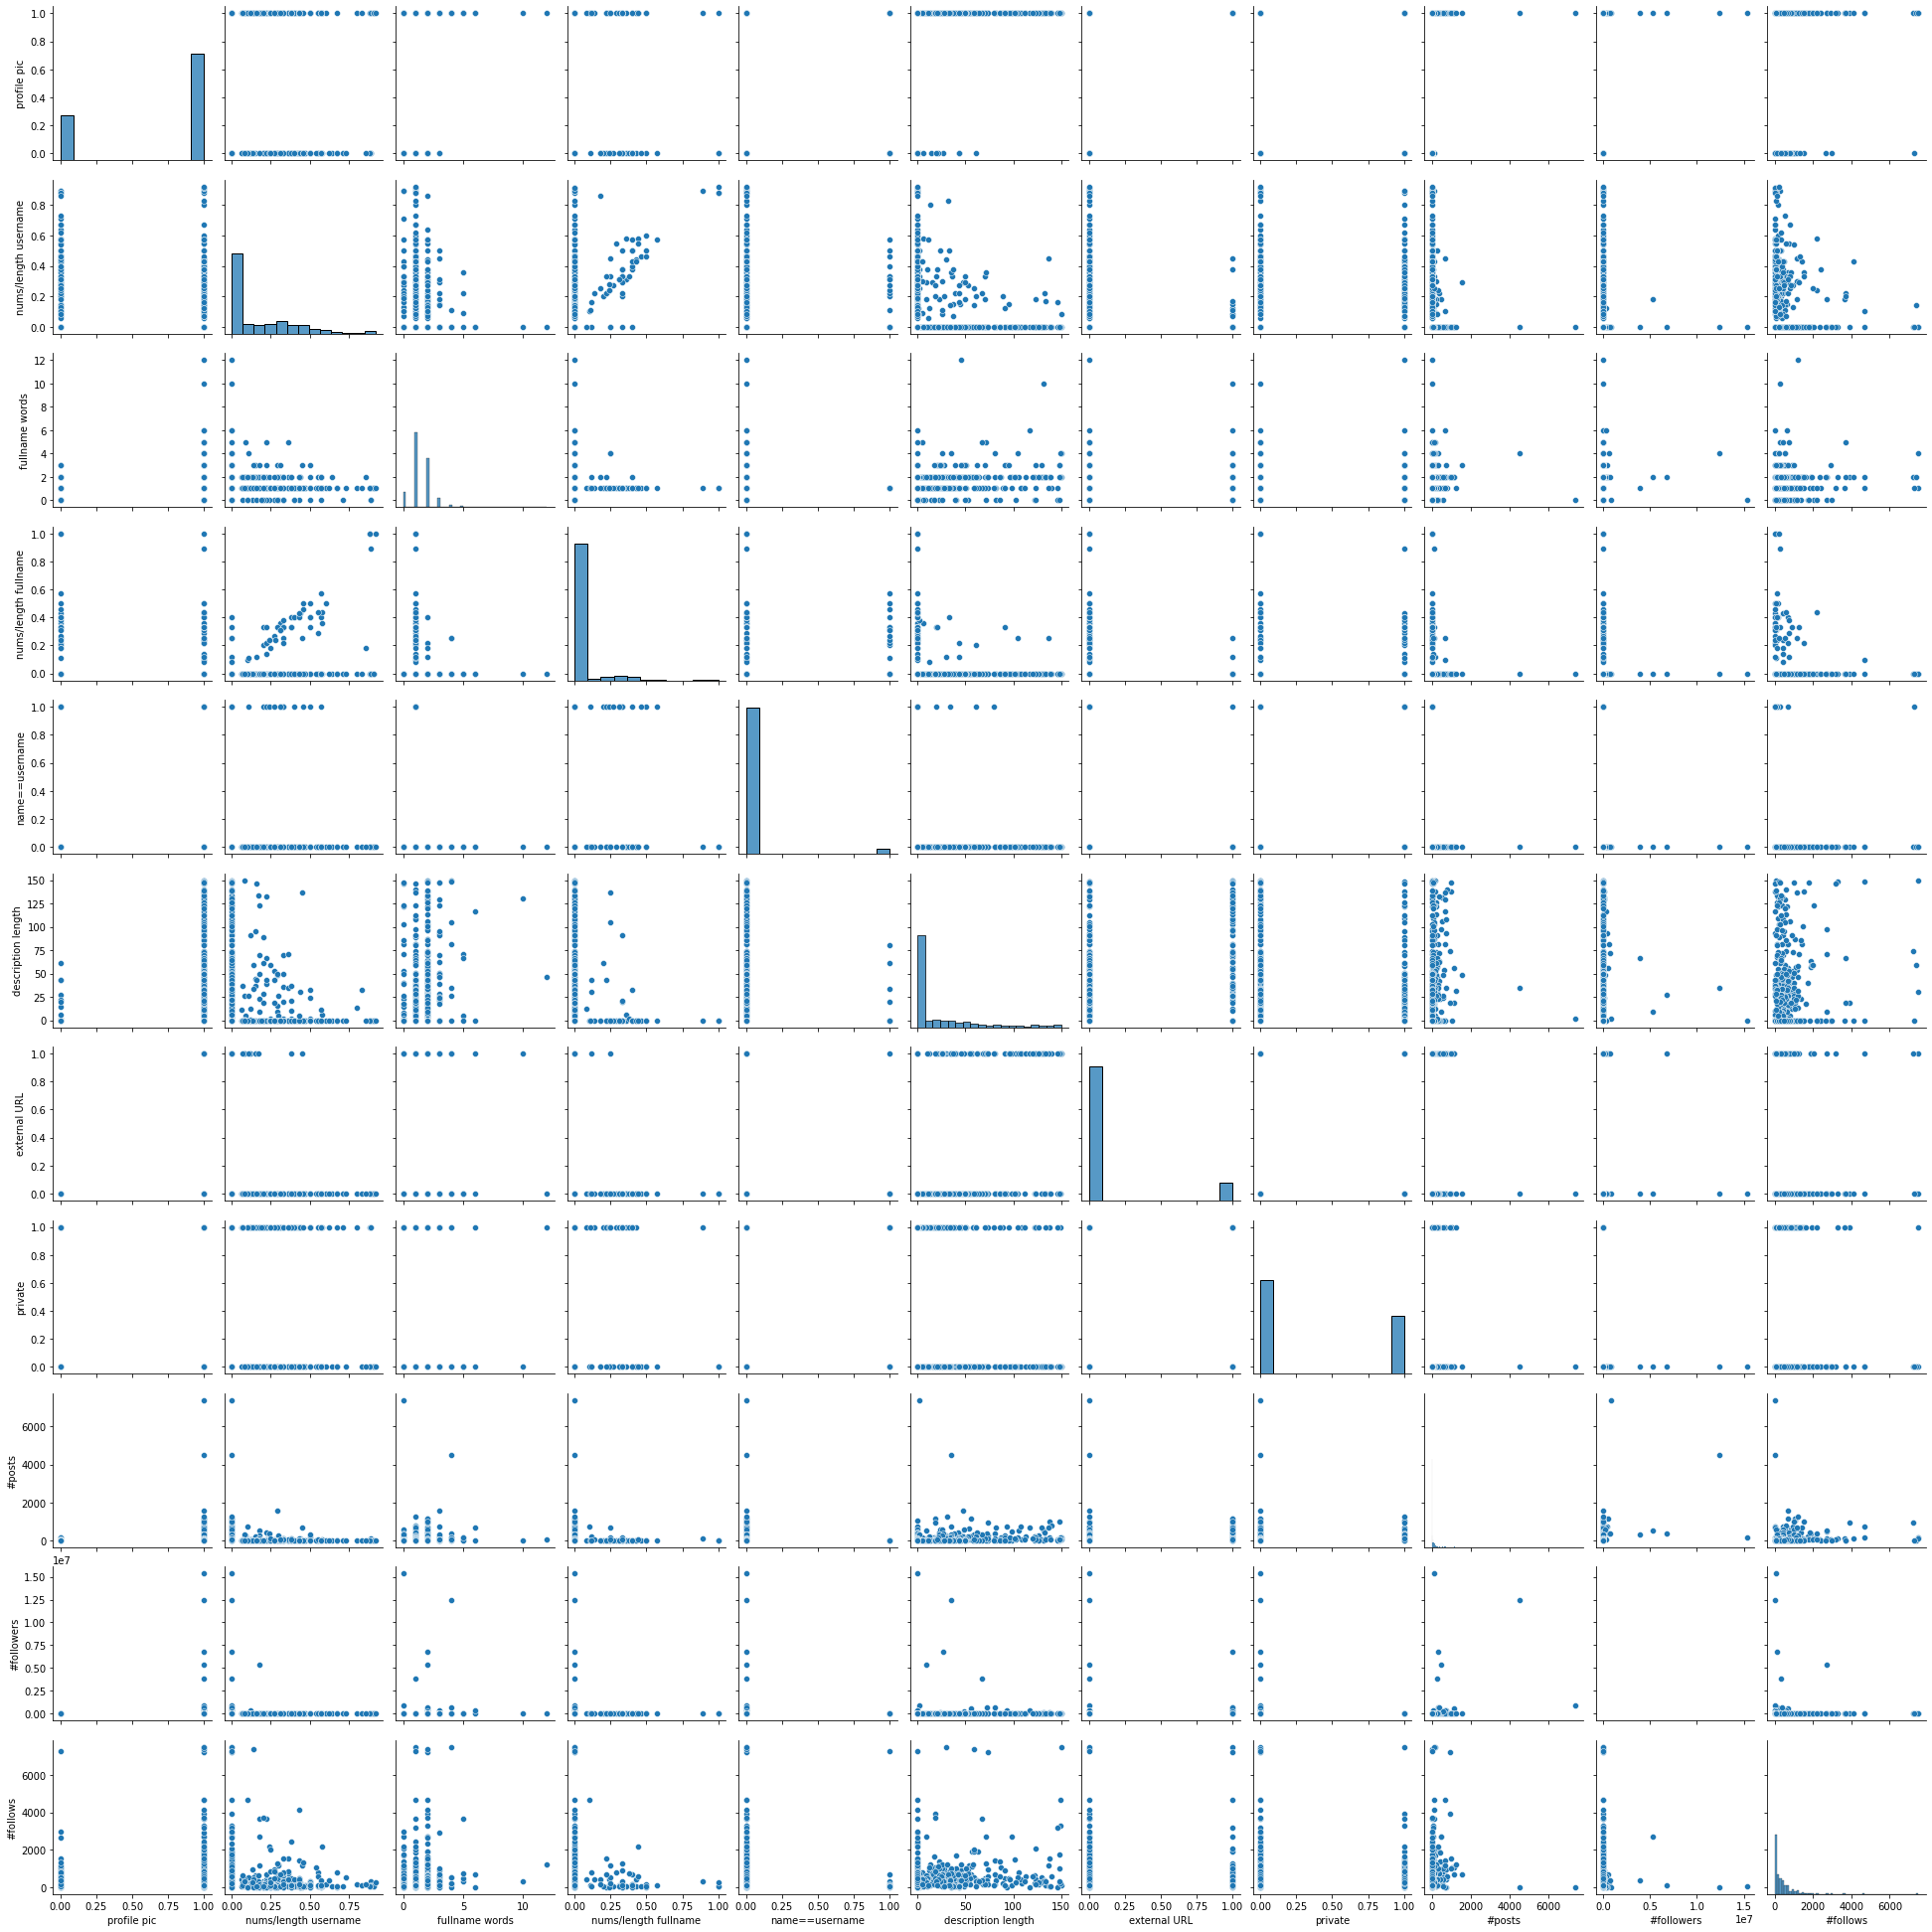

In [ ]:
sns.pairplot(X)

In [ ]:
print(X.isnull().sum())

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
dtype: int64


# Бейзлайн

In [ ]:
X_train_bl, X_test_bl, y_train_bl, y_test_bl = train_test_split(X, y, test_size=0.2, random_state=37)

In [ ]:
y_train_bl.shape

(460, 1)

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_bl, y_train_bl)
DummyClassifier(strategy='most_frequent')

DummyClassifier(strategy='most_frequent')

In [ ]:
bl_results = dummy_clf.predict(X_test_bl)
#dummy_clf.score(X_test_bl, y_test_bl)

In [ ]:
print(classification_report(y_test_bl, bl_results))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64        55
           1       0.00      0.00      0.00        61

    accuracy                           0.47       116
   macro avg       0.24      0.50      0.32       116
weighted avg       0.22      0.47      0.31       116



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Валидация

In [ ]:
y = y.values.ravel()

### Поиск модели

In [ ]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    plt.grid()
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    plt.legend(loc="best")

    return plt

#plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4)

#plt.show()

In [ ]:
def cv4models(model, cv_X, cv_y, scoring, cv):
  scores = cross_validate(model, cv_X, cv_y, cv=cv, scoring=scoring, return_train_score=True)
  train_scores = scores['train_score']
  val_scores = scores['test_score']

  train = np.mean(train_scores)
  val = np.mean(val_scores)

  print("Model: {} ".format(model.__class__.__name__))

  print("train_score: {:.3f}".format(train)) 

  print("validation_score: {:.3f}".format(val))

  print('_____________________________')

  plot_learning_curve(
    model,
    '1',
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5))  

  plt.show()

Model: LogisticRegression 
train_score: 0.928
validation_score: 0.922
_____________________________


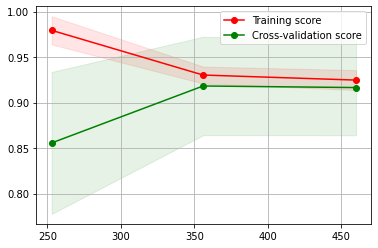

Model: SVC 
train_score: 0.524
validation_score: 0.522
_____________________________


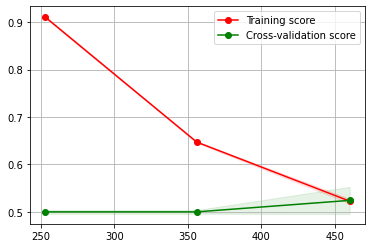

Model: GaussianNB 
train_score: 0.697
validation_score: 0.696
_____________________________


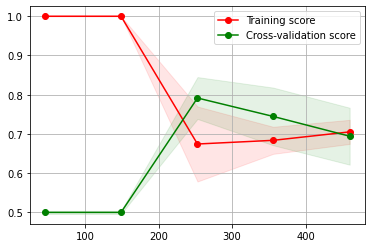

Model: RandomForestClassifier 
train_score: 1.000
validation_score: 0.918
_____________________________


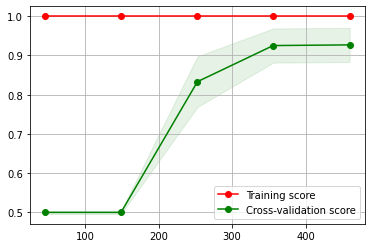

Model: GradientBoostingClassifier 
train_score: 0.997
validation_score: 0.911
_____________________________


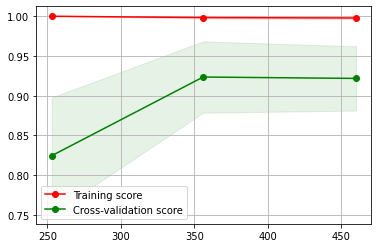

In [ ]:
models = [LogisticRegression(max_iter=600),
              SVC(), 
              GaussianNB(),
              RandomForestClassifier(random_state=55),
              GradientBoostingClassifier(random_state=56)]

for md in models:
  cv4models(md, X, y, 'accuracy', 7)

## Поиск гиперпараметров

In [ ]:
RF_clf = RandomForestClassifier()

parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

grid = GridSearchCV(RF_clf, parametrs, cv=5)
grid.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [ ]:
grid.best_params_

{'max_depth': 11,
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'n_estimators': 50}

In [ ]:
GB_clf = GradientBoostingClassifier()

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.05, 0.1],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"]
    }

grid = GridSearchCV(GB_clf, parameters, cv=5)
grid.fit(X, y)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'loss': ['deviance'], 'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                         'min_samples_split': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ])})

In [ ]:
grid.best_params_

{'learning_rate': 0.05,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 0.24545454545454548,
 'min_samples_split': 0.13636363636363638}

In [ ]:
models_semi = [
              RandomForestClassifier(max_depth =  11, min_samples_leaf = 6, min_samples_split = 4, n_estimators = 50),
              GradientBoostingClassifier(learning_rate = 0.05, loss = 'deviance', max_depth = 3, max_features = 'log2', min_samples_leaf = 0.24545454545454548, min_samples_split = 0.13636363636363638)
              ]

Model: RandomForestClassifier 
train_score: 0.950
validation_score: 0.920
_____________________________


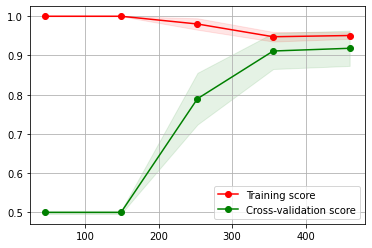

Model: GradientBoostingClassifier 
train_score: 0.942
validation_score: 0.924
_____________________________


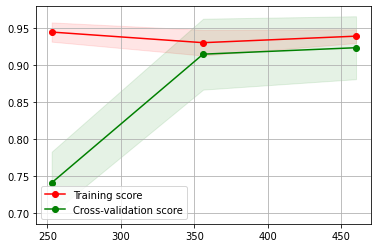

In [ ]:
for md in models_semi:
  cv4models(md, X, y, 'accuracy', 7)

### Инжиниринг

Highest scoring feature number: 1 

Model: RandomForestClassifier 
train_score: 0.884
validation_score: 0.838
_____________________________


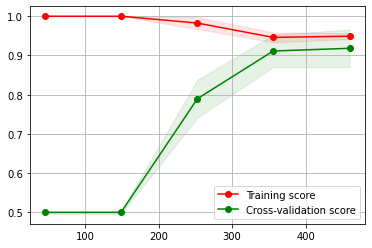

Model: GradientBoostingClassifier 
train_score: 0.868
validation_score: 0.844
_____________________________


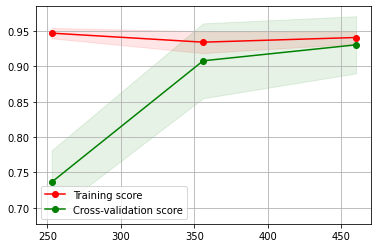

Highest scoring feature number: 2 

Model: RandomForestClassifier 
train_score: 0.897
validation_score: 0.868
_____________________________


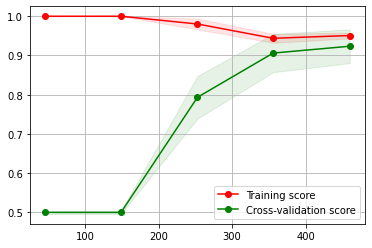

Model: GradientBoostingClassifier 
train_score: 0.893
validation_score: 0.882
_____________________________


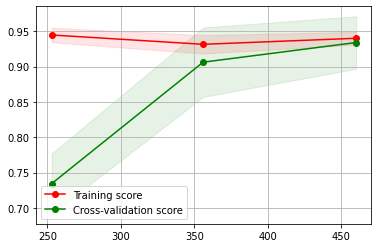

Highest scoring feature number: 3 

Model: RandomForestClassifier 
train_score: 0.928
validation_score: 0.873
_____________________________


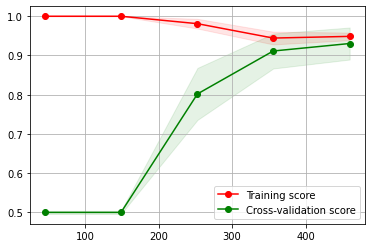

Model: GradientBoostingClassifier 
train_score: 0.906
validation_score: 0.878
_____________________________


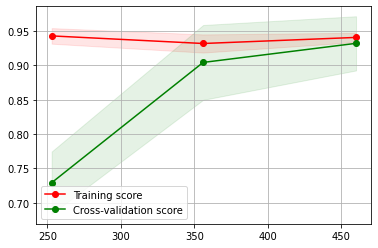

Highest scoring feature number: 4 

Model: RandomForestClassifier 
train_score: 0.937
validation_score: 0.910
_____________________________


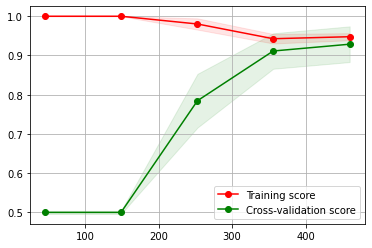

Model: GradientBoostingClassifier 
train_score: 0.911
validation_score: 0.896
_____________________________


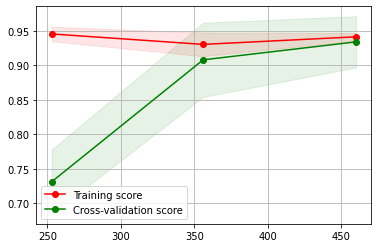

Highest scoring feature number: 5 

Model: RandomForestClassifier 
train_score: 0.939
validation_score: 0.903
_____________________________


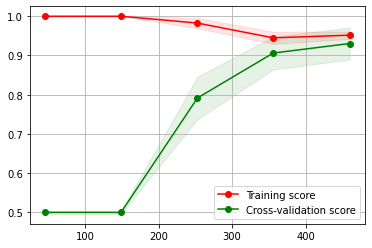

Model: GradientBoostingClassifier 
train_score: 0.918
validation_score: 0.896
_____________________________


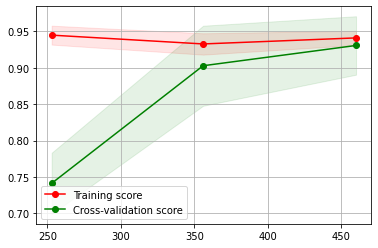

Highest scoring feature number: 6 

Model: RandomForestClassifier 
train_score: 0.935
validation_score: 0.904
_____________________________


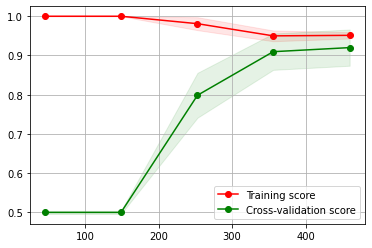

Model: GradientBoostingClassifier 
train_score: 0.913
validation_score: 0.901
_____________________________


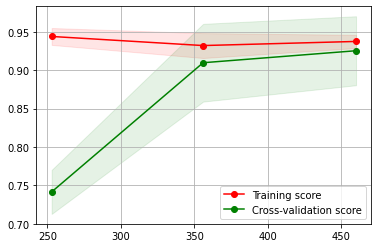

Highest scoring feature number: 7 

Model: RandomForestClassifier 
train_score: 0.950
validation_score: 0.917
_____________________________


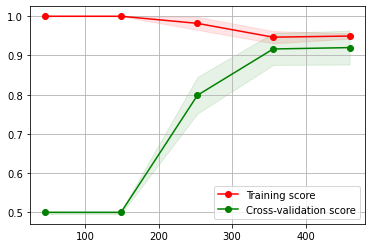

Model: GradientBoostingClassifier 
train_score: 0.943
validation_score: 0.924
_____________________________


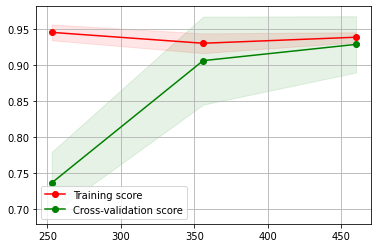

Highest scoring feature number: 8 

Model: RandomForestClassifier 
train_score: 0.950
validation_score: 0.925
_____________________________


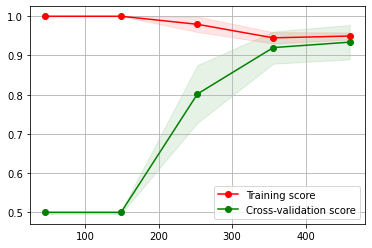

Model: GradientBoostingClassifier 
train_score: 0.945
validation_score: 0.927
_____________________________


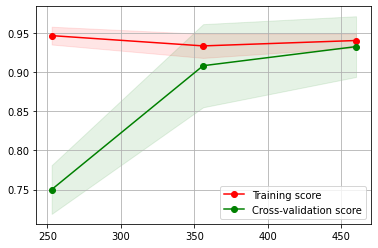

Highest scoring feature number: 9 

Model: RandomForestClassifier 
train_score: 0.952
validation_score: 0.920
_____________________________


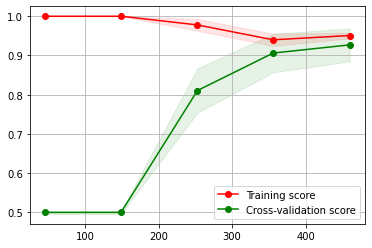

Model: GradientBoostingClassifier 
train_score: 0.944
validation_score: 0.929
_____________________________


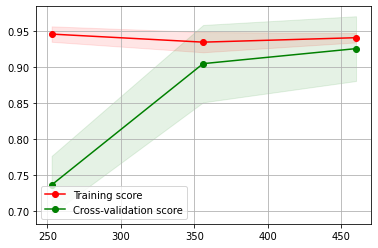

Highest scoring feature number: 10 

Model: RandomForestClassifier 
train_score: 0.949
validation_score: 0.924
_____________________________


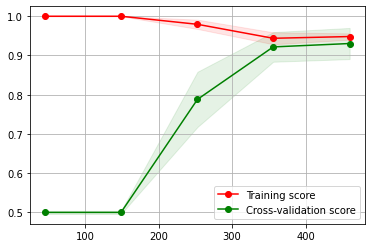

Model: GradientBoostingClassifier 
train_score: 0.942
validation_score: 0.932
_____________________________


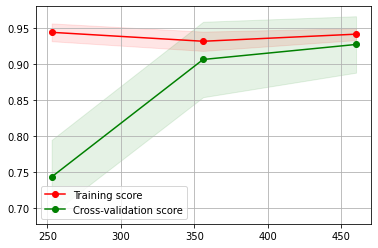

In [ ]:
for ft in range (1,11):
  X_new = SelectKBest(chi2, k=ft).fit_transform(X, y)
  print('Highest scoring feature number:', ft, '\n')
  for md in models_semi:
    cv4models(md, X_new, y, 'accuracy', 7)

In [ ]:
X_k = SelectKBest(chi2, k=9).fit_transform(X, y)
print(X_k)

[[1.00e+00 2.70e-01 0.00e+00 ... 3.20e+01 1.00e+03 9.55e+02]
 [1.00e+00 0.00e+00 2.00e+00 ... 2.86e+02 2.74e+03 5.33e+02]
 [1.00e+00 1.00e-01 2.00e+00 ... 1.30e+01 1.59e+02 9.80e+01]
 ...
 [1.00e+00 5.70e-01 2.00e+00 ... 4.00e+00 9.60e+01 3.39e+02]
 [1.00e+00 5.70e-01 1.00e+00 ... 0.00e+00 5.70e+01 7.30e+01]
 [1.00e+00 2.70e-01 1.00e+00 ... 2.00e+00 1.50e+02 4.87e+02]]


In [ ]:
scaler = StandardScaler()
scale = scaler.fit_transform(X_k)
print(scale)

[[ 0.65248952  0.49629929 -1.38831247 ... -0.18793216 -0.09271072
   0.48694486]
 [ 0.65248952 -0.76591601  0.51339498 ...  0.44440367 -0.09079728
   0.02684091]
 [ 0.65248952 -0.29842886  0.51339498 ... -0.23523287 -0.09363554
  -0.44743686]
 ...
 [ 0.65248952  1.89876073  0.51339498 ... -0.25763847 -0.09370482
  -0.18467607]
 [ 0.65248952  1.89876073 -0.43745874 ... -0.26759651 -0.09374771
  -0.4746942 ]
 [ 0.65248952  0.49629929 -0.43745874 ... -0.26261749 -0.09364544
  -0.0233126 ]]


In [ ]:
X_ks = scale

### Пробую еще раз поискать гиперпараметры

In [ ]:
RF_clf = RandomForestClassifier()

parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

grid = GridSearchCV(RF_clf, parametrs, cv=5)
grid.fit(X_ks, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [ ]:
grid.best_params_

{'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 8,
 'n_estimators': 40}

Model: RandomForestClassifier 
train_score: 0.948
validation_score: 0.922
_____________________________


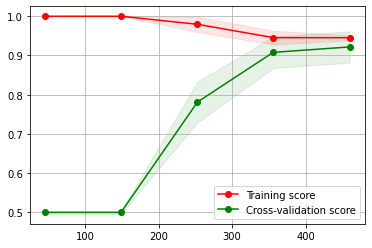

In [ ]:
fin_model = RandomForestClassifier(max_depth = 7, min_samples_leaf = 7, min_samples_split = 8, n_estimators = 40)

cv4models(fin_model, X_ks, y, 'accuracy', 7)

# Evaluation


In [ ]:
y_train = insta_data.fake
y_train = pd.DataFrame(y_train)

X_train = insta_data.drop(columns='fake')

In [ ]:
X_train = SelectKBest(chi2, k=9).fit_transform(X_train, y_train)
y_train = y_train.values.ravel()

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/mlproject/test.csv', header = 0)
X_test = test.drop(columns='fake')
y_test = test['fake']

In [ ]:
X_test = SelectKBest(chi2, k=9).fit_transform(X_test, y_test)
y_test = y_test.values.ravel()

In [ ]:
while True:
  continue

KeyboardInterrupt: ignored

In [ ]:
X_train_sc = scaler.fit_transform(X_train)

In [ ]:
X_test_sc = scaler.fit_transform(X_test)

In [ ]:
clf = RandomForestClassifier(max_depth = 7, min_samples_leaf = 7, min_samples_split = 8, n_estimators = 40)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=7, min_samples_split=8,
                       n_estimators=40)

In [ ]:
y_predict = clf.predict(X_test)

In [ ]:
def plot_confusion_matrix(test_Y, predict_y):
 C = confusion_matrix(test_Y, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

In [ ]:
print(classification_report(y_test, y_predict, target_names=["real", "fake"]))

              precision    recall  f1-score   support

        real       0.89      0.90      0.89        60
        fake       0.90      0.88      0.89        60

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



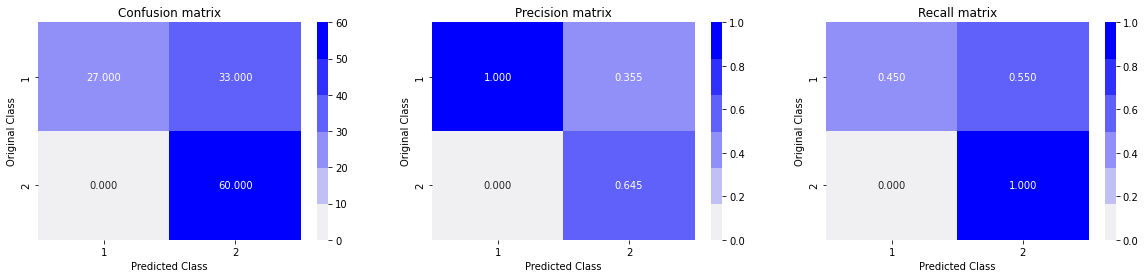

In [ ]:
plot_confusion_matrix(y_test, y_predict)